today's topic is related to python. since i don't read any paper so i couldn't help but choose this. 

it's totally my pure curiosity as learning new computer languge. 

It might not help to you guys and i'm sure you don't need to know during developing 

i would like to start by explaining why i choose this topic.

first, i wanna mention our study with fluent python book since this topic started from that. 

fluent python
2019년 9월 ~ 2020년 1월 (one day a week, totally 5 months or about 20 days) 
the book has 21 chapter with 600 pages (without appendix and table) totally 766

schedule table devied by pages (always flexable and put many days off)

https://docs.google.com/spreadsheets/d/1y-K7Jj2iSz_Vje894wbIDdy3Q3DwsYYuJPZJpjqOWCw/edit#gid=0

if available, we shared our thought on a fixed day almost every week. 

the first chapter is Data Model. the curiousity was started by that time.

but i couldn't get what data model is. and i found the metadata concept. 

and i kept some blogs looked helping to undersand it and i decided to read them if i got bored while free time.

# Part1 Prologue
## CH1.The Python Data Model

* 데이터 모델 : 일종의 프레임워크, 언어 자체의 구성단위에 대한 인터페이스를 공식적으로 정의한다. 


* Difference between __str__ and __repr__?

https://stackoverflow.com/questions/1436703/difference-between-str-and-repr

* Data Model reference 

https://docs.python.org/3/reference/datamodel.html


* python data model 이해하기

https://www.slideshare.net/dahlmoon/numpy-20160330

* 파이썬의 메타클래스란 무엇인가?

https://code.tutsplus.com/ko/tutorials/quick-tip-what-is-a-metaclass-in-python--cms-26016

https://blog.ionelmc.ro/2015/02/09/understanding-python-metaclasses/

* why python is slow

http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/



but i didn't have the tiem to read them even during seolnal too. 
finally i started to read it last week after.

and i would like to share what i read 

# Why Python is Slow: Looking Under the Hood

http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/

he wrote this blog used cpython (default interpreter) to understand python code in the memory.

### what is cpython 

https://stackoverflow.com/questions/17130975/python-vs-cpython

CPython happens to be implemented in C. That is just an implementation detail, really. CPython compiles your Python code into bytecode (transparently) and interprets that bytecode in a evaluation loop. So CPython does not translate your Python code to C by itself. 

Separately we have **a programming language implementation** which in most cases, is the actual interpreter or compiler.

1. **Python**: It is a language, it only states/describes how to convey/express yourself to the interpreter (the program which accepts your python code).
2. **Implementation**: It is all about how the interpreter was written, specifically, in what language and what it ends up doing.
3. **Bytecode**: It is the code that is processed by a program, usually referred to as a virtual machine, rather than by the "real" computer machine, the hardware processor.

<img src=https://i.imgur.com/PJME67T.png>

source : https://indianpythonista.wordpress.com/2018/01/04/how-python-runs/

In [27]:
import dis
dis.dis('s[a] += b')

  1           0 LOAD_NAME                0 (s)
              2 LOAD_NAME                1 (a)
              4 DUP_TOP_TWO
              6 BINARY_SUBSCR
              8 LOAD_NAME                2 (b)
             10 INPLACE_ADD
             12 ROT_THREE
             14 STORE_SUBSCR
             16 LOAD_CONST               0 (None)
             18 RETURN_VALUE


1. s[a] 값을 스택의 꼭대기(TOS)에 놓음
2. TOS += b 연산수행
3. TOS 를 s[a] 에 할당

# Why Python is Slow

## reason 1. Python is Dynamically Typed rather than Statically Typed

http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/#1.-Python-is-Dynamically-Typed-rather-than-Statically-Typed.

```c
/* C code */
int a = 1;
int b = 2;
int c = a + b;
```

```python
# python code
a = 1
b = 2
c = a + b
```

The difference between a C variable (I'm using C as a stand-in for compiled languages) and a Python variable is summarized by this diagram

c code is already defined the type. that mean complier can know how much memory sould be assign 

1. Assign <int> 1 to a
2. Assign <int> 2 to b
3. call binary_add<int, int>(a, b)
4. Assign the result to c
    
    
here the interpreter knows only that 1 and 2 are objects, the interpreter must inspect what type it is. 

Python Addition

1. Assign 1 to a

1a. Set a->PyObject_HEAD->typecode to integer<br>
1b. Set a->val = 1

2. Assign 2 to b

2a. Set b->PyObject_HEAD->typecode to integer<br>
2b. Set b->val = 2

3. call binary_add(a, b)

3a. find typecode in a->PyObject_HEAD <br>
3b. a is an integer; value is a->val<br>
3c. find typecode in b->PyObject_HEAD<br>
3d. b is an integer; value is b->val<br>
3e. call binary_add<int, int>(a->val, b->val)<br>
3f. result of this is result, and is an integer.

4. Create a Python object c

4a. set c->PyObject_HEAD->typecode to integer
4b. set c->val to result
    

## reason 2. Python is interpreted rather than compiled.

## reason 3. Python's object model can lead to inefficient memory access

<img src=http://jakevdp.github.io/images/array_vs_list.png />

Python you might use the standard List object 

A NumPy array in its simplest form is a Python object build around a C array. 

That is, it has a pointer to a contiguous data buffer of values. 

A Python list, on the other hand, has a pointer to a contiguous buffer of pointers, each of which points to a Python object which in turn has references to its data (in this case, integers). 

hacking around on the internals of the Python language, and found that the process itself is pretty enlightening.

## Digging into Python Integers


In [1]:
import sys
print(sys.version[:5])

3.6.8


In [2]:
x = 42
x

42

we'll use Python's built-in ctypes module to introspect Python's integer type from the Python interpreter itself. 

our integer object works out to something like the following structure:

In [3]:
import ctypes

 
https://hg.python.org/cpython/file/3.4/Include/object.h#l105

```c
struct _longobject{
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};```

ob_refcnt변수는 개체의 참조 수, 
ob_type변수는 개체의 모든 형식 및 메서드의 정의가 들어있는 구조체에 대한 포인터, 
그리고 ob_digit변수는 실제 수치를 가지고 있습니다.

The ob_refcnt variable is the reference count for the object, the ob_type variable is a pointer to the structure containing all the type information and method definitions for the object, and the ob_digit holds the actual numerical value.

intStructu 를 선언하고 42 (integer 객체) 를 생성하면 해당 field 정보가 순서에 맞게 매칭된다. 

In [4]:
class IntStruct(ctypes.Structure):
    _fields_ = [("ob_type", ctypes.c_void_p),
                ("ob_ref", ctypes.c_long),
                ("ob_size", ctypes.c_ulong),
                ("ob_digit", ctypes.c_long),
               ]
    
    def __repr__(self):
        return ("IntStruct(ob_digit={self.ob_digit}, refcount={self.ob_ref})").format(self=self)

In [5]:
num = 42
IntStruct.from_address(id(42))

IntStruct(ob_digit=42, refcount=10277248)

In [6]:
class IntStruct(ctypes.Structure):
    _fields_ = [("ob_ref", ctypes.c_long),
                ("ob_type", ctypes.c_void_p),
                ("ob_size", ctypes.c_ulong),
                ("ob_digit", ctypes.c_long),
               ]
    
    def __repr__(self):
        return ("IntStruct(ob_digit={self.ob_digit}, refcount={self.ob_ref})").format(self=self)

In [7]:
num = 42
IntStruct.from_address(id(42))

IntStruct(ob_digit=42, refcount=33)

In [11]:
id(42)

10915808

https://docs.python.org/2/library/ctypes.html#ctypes._CData.from_address

**from_address(address)**
> This method returns a ctypes type instance using the memory specified by address which must be an integer.

Python implements common integer values as singletons: that is, only one copy of these numbers exist in memory. 

In [43]:
Istruct = IntStruct.from_address(id(42))
Istruct.ob_type, Istruct.ob_size, Istruct.ob_digit

(10277248, 1, 42)

In [39]:
type(Istruct)

__main__.IntStruct

In [9]:
256

256

Text(0, 0.5, 'reference count')

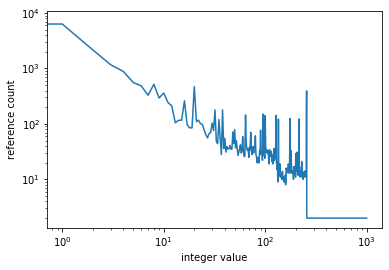

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
plt.loglog(range(1000), [sys.getrefcount(i) for i in range(1000)])
plt.xlabel('integer value')
plt.ylabel('reference count')

## Digging into Python Lists

Let's apply the above ideas to a more complicated type: Python lists. 

Analogously to integers, we find the definition of the list object itself in [Include/listobject.h](https://hg.python.org/cpython/file/3.4/Include/listobject.h#l23)

```c
typedef struct{
    long ob_refcnt;
    PyTypeObject *ob_type;
    Pyssize_t ob_size;
    PyObject **ob_item;
    long allocated;    
}PyListObject;
```

In [11]:
class ListStruct(ctypes.Structure):
    _fields_ = [("ob_refcnt", ctypes.c_long),
                ("ob_type", ctypes.c_void_p),
                ("ob_size", ctypes.c_ulong), 
                ("ob_item", ctypes.c_long),# pyObject** pointer cast to long
                ("ob_digit", ctypes.c_long),
               ]
    
    def __repr__(self):
        return ("ListStruct(len={self.ob_size}, refcount={self.ob_refcnt})").format(self=self)

PyObject \*\*ob_item은 리스트의 내용물을 가르키고, ob_size값은 리스트안에 얼마나 많은 아이템들이 있는지 말해줍니다.

Here the PyObject \*\*ob_item is what points to the contents of the list, and the ob_size value tells us how many items are in the list.

In [13]:
L = [1,2,3,4,5]
ListStruct.from_address(id(L))

ListStruct(len=5, refcount=1)

In [18]:
tup = [L, L]
ListStruct.from_address(id(L))

ListStruct(len=5, refcount=3)

 let's see about finding the actual elements within the list.

In [19]:
del L[4]

In [20]:
L

[1, 2, 3, 4]

In [46]:
listStruct = ListStruct.from_address(id(L))
listStruct.ob_size, listStruct.ob_item, listStruct.ob_digit

(4, 140053468754968, 5)

In [47]:
tup[1]

[1, 2, 3, 4]

In [48]:
id(L)

140053469547208

As we saw above, the elements are stored via a contiguous array of PyObject pointers. Using ctypes, we can actually create a compound structure consisting of our IntStruct objects from before:

In [14]:
# get a raw pointer to our list
Lstruct = ListStruct.from_address(id(L))

# create a type which is an array of integer pointers the same length as L
PtrArray = Lstruct.ob_size * ctypes.POINTER(IntStruct)

# instantiate this type using the ob_item pointer
L_values = PtrArray.from_address(Lstruct.ob_item)

In [15]:
[ptr[0] for ptr in L_values]  # ptr[0] dereferences the pointer

[IntStruct(ob_digit=1, refcount=7621),
 IntStruct(ob_digit=2, refcount=3430),
 IntStruct(ob_digit=3, refcount=1322),
 IntStruct(ob_digit=4, refcount=880),
 IntStruct(ob_digit=5, refcount=1000)]

## Numpy List

https://github.com/numpy/numpy/blob/maintenance/1.8.x/numpy/core/include/numpy/ndarraytypes.h#L646

In [16]:
import numpy as np
np.__version__

'1.17.4'

Let's start by creating a structure that represents the numpy array itself. 

In [18]:
class NumpyStruct(ctypes.Structure):
    _fields_ = [("ob_refcnt", ctypes.c_long),
                ("ob_type", ctypes.c_void_p),
                ("ob_data", ctypes.c_long), # char* pointer cas to long
                ("ob_ndim", ctypes.c_int),
                ("ob_shape", ctypes.c_voidp),
                ("ob_strides", ctypes.c_voidp),
               ]
    @property
    def shape(self):
        return tuple((self.ob_ndim*ctypes.c_int64).from_address(self.ob_shape))
    
    @property
    def strides(self):
        return tuple((self.ob_ndim*ctypes.c_int64).from_address(self.ob_strides))
    
    
    def __repr__(self):
        return ("NumpyStruct(shape={self.shape}, refcount={self.ob_refcnt})").format(self=self)

In [19]:
ctypes.c_int64

ctypes.c_long

In [20]:
ctypes.c_int

ctypes.c_int

In [21]:
x = np.random.random((10, 20))
xstruct = NumpyStruct.from_address(id(x))
xstruct

NumpyStruct(shape=(10, 20), refcount=1)

In [22]:
L = [x,x,x]  # add three more references to x
xstruct

NumpyStruct(shape=(10, 20), refcount=4)

We see that we've pulled out the correct shape information. Let's make sure the reference count is correct:
    
For simplicity we'll ignore the strides and assume it's a C-contiguous array;    

The data variable is now a view of the contiguous block of memory defined in the NumPy array! To show this, we'll change a value in the array...

In [23]:
x = np.arange(10)
xstruct = NumpyStruct.from_address(id(x))
size = np.prod(xstruct.shape)

# assume an array of integers
arraytype = size * ctypes.c_long
data = arraytype.from_address(xstruct.ob_data)

[d for d in data]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [24]:
[id(d) for d in data]

[10914464,
 10914496,
 10914528,
 10914560,
 10914592,
 10914624,
 10914656,
 10914688,
 10914720,
 10914752]

In [25]:
size

10

and then, what is Data model? 

https://www.slideshare.net/dahlmoon/numpy-20160330
    
data model 이란 python 이 제공하는 하나의 framwork 로 sqeunce, iteration 등의 객체를 말한다. 

In [26]:
type(object)

type

VISUALIZE CODE

http://www.pythontutor.com/visualize.html

http://pythontutor.com/

Query on 'object' class & 'type' class in python

https://stackoverflow.com/questions/22921093/query-on-object-class-type-class-in-python

In [2]:
print(isinstance(type,object))
print(type.__class__)

print(isinstance(object,type))

True
<class 'type'>
True


type and object are instances of each other

<img src="https://i.stack.imgur.com/33Zt8.png">